In [1]:
library(lubridate)
library(timeDate)
library(dplyr)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
dta = read.csv('../data/seattle_911_clean.csv')
dta$Timestamp <- as.POSIXct(dta$Timestamp)
dta$Date <- as.Date(dta$Timestamp)
dta$Time <- format(dta$Timestamp,"%H:%M:%S")
sapply(dta, typeof)

Address        Type    Latitude   Longitude   Timestamp        Date 
  "integer"   "integer"    "double"    "double"    "double"    "double" 
       Time 
"character"

In [3]:
dta$Weekday <- weekdays(dta$Date)
dta$Night <- as.integer((dta$Time < "06:00:00") | (dta$Time > "18:00:00"))
dta$DangHoliday <- as.integer(((month(dta$Date) == 7) & (day(dta$Date) == 4)) |
                              ((month(dta$Date) == 1) & (day(dta$Date) == 1)))

In [4]:
years <- seq(2010, 2025)
tgiving <- data.frame(as.Date(USThanksgivingDay(year = years)))
colnames(tgiving) <- "dates"
xmas <- data.frame(as.Date(ChristmasDay(year = years)))
colnames(xmas) <- "dates"
trav <- rbind(tgiving, tgiving - 1, tgiving - 2, xmas, xmas - 1, xmas + 1)
dta$TravHoliday <- as.integer(dta$Date %in% trav$dates)

In [5]:
earliest_date <- min(dta$Date)
dta$DayNumber <- as.integer(dta$Date - earliest_date)

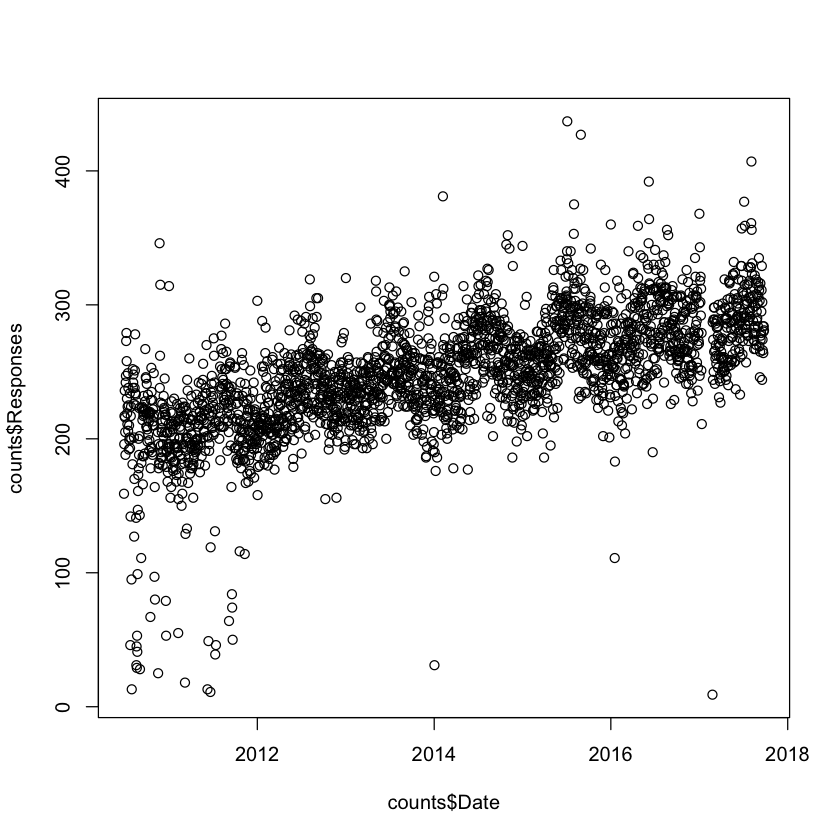

In [6]:
# responses peak around August 3rd each year
counts <- dta %>% group_by(Date) %>% summarise(Responses = n())
plot(x = counts$Date, y = counts$Responses)

In [7]:
# use cosine wave on 365.25 day cycle peaking in early August to model seasonality
dta$Seasonality <- cos((dta$DayNumber - 35) * ((2 * pi) / 365.25))

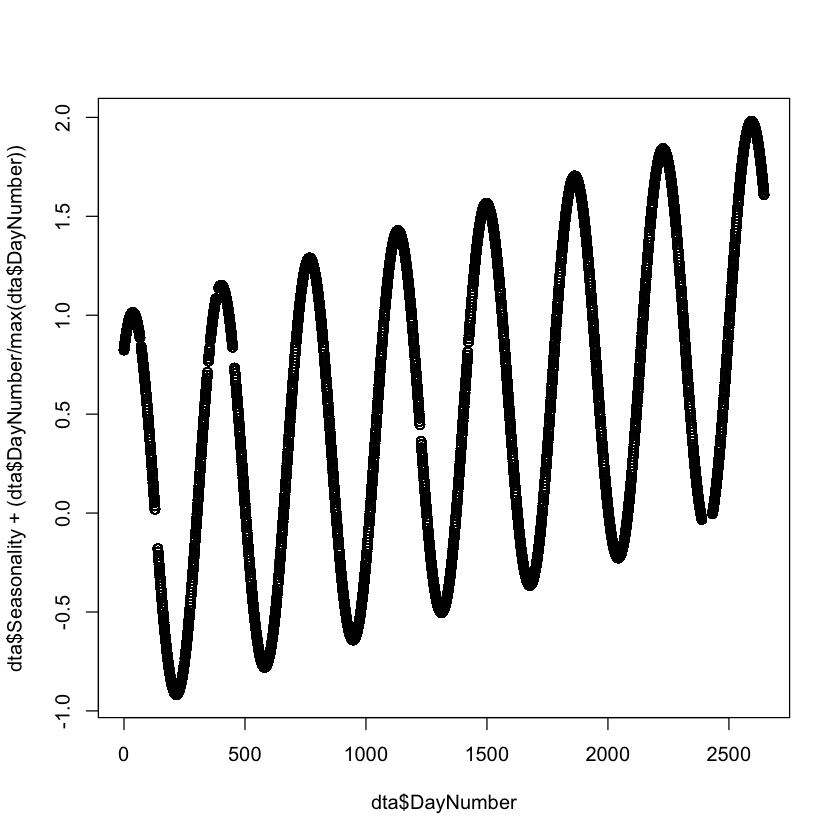

In [8]:
plot(dta$DayNumber, dta$Seasonality + (dta$DayNumber / max(dta$DayNumber)))

In [9]:
write.csv(dta, file = '../data/seattle_911_time_features.csv', row.names=FALSE)